## Mappeoppgave 5
a) Velger å bruke en tabell som viser jenters høyde og vekt i forhold til alder. Tallene er tatt fra en eldre undersøkelse. 

In [1]:
# Alle pakkene jeg blir å trenge
from bs4 import BeautifulSoup
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from matplotlib import pyplot as plt
import requests
import numpy as np
import pandas as pd

In [2]:
# Henter ut tallene fra tabellen fra den gitte nettsiden
def fetch_html_tables(url):
    "Returns a list of tables in the html of url"
    page = requests.get(url)
    bs=BeautifulSoup(page.content)
    tables=bs.find_all('table')
    return tables

tables=fetch_html_tables('https://www.nettdoktor.no/helseraad/fakta/jenterveksttabell.php')
table_html=tables[0]

#printing top
print(str(table_html)[:1000])

<table border="1" width="420">
<tr>
<td align="center" height="32" width="60">Alder</td>
<td align="center" height="32" width="60">Høyde lav / cm*</td>
<td align="center" height="32" width="60">Høyde middel / cm</td>
<td align="center" height="32" width="60">Høyde høy / cm*</td>
<td align="center" height="32" width="60">Vekt lav / kg*</td>
<td align="center" height="32" width="60">Vekt middel / kg</td>
<td align="center" height="32" width="60">Vekt høy / kg*</td>
</tr>
<tr>
<td align="center" height="19" width="60">Nyfødt</td>
<td align="center" height="19" width="60">46</td>
<td align="center" height="19" width="60">51</td>
<td align="center" height="19" width="60">56</td>
<td align="center" height="19" width="60">2,2</td>
<td align="center" height="19" width="60">3,5</td>
<td align="center" height="19" width="60">4,2</td>
</tr>
<tr>
<td align="center" height="19" width="60">3 mnd.</td>
<td align="center" height="19" width="60">56</td>
<td align="center" height="19" width="60">61</td>

In [4]:
# Nå finner vi innholdstaggene og returnerer en tabell
def html_to_table(html):
    "Returns the table defined in html as a list"
    #defining the table:
    table=[]
    #iterating over all rows
    for row in html.find_all('tr'):
        r=[]
        #finding all cells in each row:
        cells=row.find_all('td')
        
        #if no cells are found, look for headings
        if len(cells)==0:
            cells=row.find_all('th')
            
        #iterate over cells:
        for cell in cells:
            cell=format(cell)
            r.append(cell)
        
        #append the row to t:
        table.append(r)
    return table

def format(cell):
    "Returns a string after converting bs4 object cell to clean text"
    if cell.content is None:
        s=cell.text
    elif len(cell.content)==0:
        return ''
    else:
        s=' '.join([str(c) for c in cell.content])
        
    #here you can add additional characters/strings you want to 
    #remove, change punctuations or format the string in other
    #ways:
    s=s.replace('\xa0','')
    s=s.replace('\n','')
    return s

table=html_to_table(table_html)


#printing top
print(str(table)[:1000])

[['Alder', 'Høyde lav / cm*', 'Høyde middel / cm', 'Høyde høy / cm*', 'Vekt lav / kg*', 'Vekt middel / kg', 'Vekt høy / kg*'], ['Nyfødt', '46', '51', '56', '2,2', '3,5', '4,2'], ['3 mnd.', '56', '61', '66', '4,5', '5,7', '7,2'], ['6 mnd.', '63', '68', '72', '6,2', '7,5', '9,5'], ['9 mnd.', '68', '72', '78', '7,2', '9,0', '11,0'], ['12 mnd.', '71', '76', '82', '8,0', '10,2', '12,0'], ['18 mnd.', '76', '82', '88', '9,3', '11,5', '13,8'], ['2 år', '81', '87', '94', '10,3', '12,6', '15,5'], ['3 år', '90', '97', '104', '12,0', '15,0', '18,2'], ['4 år', '97', '105', '113', '13,7', '17,1', '21,0'], ['5 år', '103', '110', '120', '15,3', '19,0', '24,3'], ['6 år', '108', '118', '127', '16,6', '20,8', '25,6'], ['7 år', '113', '123', '133', '18,0', '23,0', '28,0'], ['8 år', '118', '128', '138', '20,5**', '25,0**', '31,0**'], ['9 år', '122', '132', '144', '23,0**', '27,5**', '35,0**'], ['10 år', '127', '138', '150', '25,5**', '30,5**', '39,0**'], ['11 år', '132', '144', '156', '27,5**', '35,0**', '

In [6]:
#Her skiller vi kolonnene med semikolon
    
';'.join(table[0])

'Alder;Høyde lav / cm*;Høyde middel / cm;Høyde høy / cm*;Vekt lav / kg*;Vekt middel / kg;Vekt høy / kg*'

In [7]:
# Gjør tabellen mer leselig, ved å lagre den som en fil. Strengen 'w' betyr at vi åpner filen for skriving (writing)
def save_data(file_name,table):
    "Saves table to file_name"
    f=open(file_name,'w')
    for row in table:
        f.write(';'.join(row)+'\n')
    f.close()
    
save_data('veksttabell.csv',table)

In [8]:
# Lager et dataframe. Bruker utf-8, istedenfor latin1 for å få Æ,Ø og Å
df = pd.read_csv('veksttabell.csv', delimiter=';', encoding='utf-8')
df

,Alder,Høyde lav / cm*,Høyde middel / cm,Høyde høy / cm*,Vekt lav / kg*,Vekt middel / kg,Vekt høy / kg*
0,Nyfødt,46,51,56,"2,2","3,5","4,2"
1,3 mnd.,56,61,66,"4,5","5,7","7,2"
2,6 mnd.,63,68,72,"6,2","7,5","9,5"
3,9 mnd.,68,72,78,"7,2","9,0","11,0"
4,12 mnd.,71,76,82,"8,0","10,2","12,0"
5,18 mnd.,76,82,88,"9,3","11,5","13,8"
6,2 år,81,87,94,"10,3","12,6","15,5"
7,3 år,90,97,104,"12,0","15,0","18,2"
8,4 år,97,105,113,"13,7","17,1","21,0"
9,5 år,103,110,120,"15,3","19,0","24,3"


In [9]:
# Her rydder jeg i dataframet. Fjer * fra kollonene og radene, i tillegg til å gjøre komma til punktum.

df.columns=df.columns.str.replace('*','', regex=True) #fjerner * fra kolonnene
df = df.replace(',','.',regex=True) # gjør om komma til punktum i alle radene
cols = ['Vekt lav / kg', 'Vekt middel / kg', 'Vekt høy / kg']
for col in cols:
    df[col] = df[col].map(lambda x: str(x).lstrip('**').rstrip('**')) # fjerner ** fra tabellen

In [10]:
df

,Alder,Høyde lav / cm,Høyde middel / cm,Høyde høy / cm,Vekt lav / kg,Vekt middel / kg,Vekt høy / kg
0,Nyfødt,46,51,56,2.2,3.5,4.2
1,3 mnd.,56,61,66,4.5,5.7,7.2
2,6 mnd.,63,68,72,6.2,7.5,9.5
3,9 mnd.,68,72,78,7.2,9.0,11.0
4,12 mnd.,71,76,82,8.0,10.2,12.0
5,18 mnd.,76,82,88,9.3,11.5,13.8
6,2 år,81,87,94,10.3,12.6,15.5
7,3 år,90,97,104,12.0,15.0,18.2
8,4 år,97,105,113,13.7,17.1,21.0
9,5 år,103,110,120,15.3,19.0,24.3


In [11]:
# Sjekker informasjonen i dataframen for å se om jeg må endre noe annet som f.eks å gjøre tallene numerisk
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Alder              23 non-null     object
 1   Høyde lav / cm     23 non-null     int64 
 2   Høyde middel / cm  23 non-null     int64 
 3   Høyde høy / cm     23 non-null     int64 
 4   Vekt lav / kg      23 non-null     object
 5   Vekt middel / kg   23 non-null     object
 6   Vekt høy / kg      23 non-null     object
dtypes: int64(3), object(4)
memory usage: 1.4+ KB


In [12]:
# Gjøre tallene numerisk
cols = ['Høyde lav / cm', 'Høyde middel / cm', 'Høyde høy / cm', 'Vekt lav / kg', 'Vekt middel / kg', 'Vekt høy / kg']
for col in cols:
    df[col] = pd.to_numeric(df[col])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Alder              23 non-null     object 
 1   Høyde lav / cm     23 non-null     int64  
 2   Høyde middel / cm  23 non-null     int64  
 3   Høyde høy / cm     23 non-null     int64  
 4   Vekt lav / kg      23 non-null     float64
 5   Vekt middel / kg   23 non-null     float64
 6   Vekt høy / kg      23 non-null     float64
dtypes: float64(3), int64(3), object(1)
memory usage: 1.4+ KB


### Regresjons linje

In [18]:
# Begynner med å lage regresjonslinjen med dataen fra dataframet. Har valgt kolonnen høy høyde og høy vekt. 
d = np.polyfit(df['Høyde høy / cm'],df['Vekt høy / kg'],1)
f = np.poly1d(d)

In [16]:
# Graden til den lineære regresjonslinjen er på 1, lager en ny kolonne som jeg kaller "Regresjons linje".
df.insert(1,'Regresjons linje',f(df['Høyde høy / cm']))

<AxesSubplot:xlabel='Høyde høy / cm'>

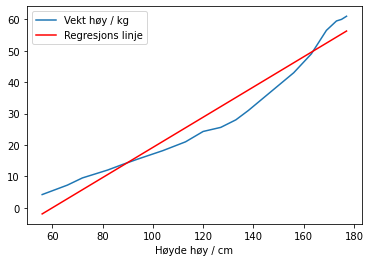

In [26]:
# Her lager vi selve plottet.
ax = df.plot(x='Høyde høy / cm', y='Vekt høy / kg')
df.plot(x='Høyde høy / cm', y='Regresjons linje',color='Red',ax=ax)

### Tolkning av resultatet

Regresjonslinjen er en rett linje som viser at responsvariabelen y beveger seg for verdien av x. Vi kan se i resultaten våres at resultatet øker, og at det har en sammenheng med at tallene øker. Med regresjonslinjen så kan vi se en klare å anslå hva høyden er når vi vet hva vekten er. Denne linjen passet godt til dataen vi har fått.

Kilder: https://towardsdatascience.com/regression-plots-with-pandas-and-numpy-faf2edbfad4f